In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plot

In [2]:
batch_size = 32

In [3]:
train_datasets = datasets.MNIST(root='../../MNIST_data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_datasets,
                                          batch_size=batch_size,
                                          shuffle=True)

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.hidden = nn.Linear(100, 128)
        self.out = nn.Linear(128, 784)
    
    def forward(self, x):
        h1 = F.relu(self.hidden(x))
        out = F.sigmoid(self.out(h1))
        return out

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.hidden = nn.Linear(784, 128)
        self.out = nn.Linear(128, 1)
    
    def forward(self, x):
        h1 = F.relu(self.hidden(x))
        out = F.sigmoid(self.out(h1))
        return out

In [6]:
generator = Generator()
discriminator = Discriminator()

In [7]:
# discriminator_real.parameters()
d_optimizer = optim.Adam(discriminator.parameters(),
                        lr=0.0001)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0001)

In [81]:
def plot_images(samples):
    fig = plot.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plot.subplot(gs[i])
        plot.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plot.imshow(sample.data.numpy().reshape(28, 28), cmap='Greys_r')

    return fig

In [79]:
def train():
    for idx, (data, target) in enumerate(train_loader):
        batch, _ = Variable(data), target
        sample = Variable(torch.randn(batch_size, 100))
        
        batch = batch.view(batch_size, 784)
        
        g_optimizer.zero_grad()
        d_optimizer.zero_grad()
        
        gen_sample = generator.forward(sample)
        disc_real = discriminator.forward(batch)
        disc_fake = discriminator.forward(gen_sample)
        
        disc_loss = nn.functional.binary_cross_entropy(disc_fake, Variable(torch.zeros(disc_fake.size()))) \
                    + nn.functional.binary_cross_entropy(disc_real, Variable(torch.ones(disc_real.size())))
        
        gen_loss = nn.functional.binary_cross_entropy(disc_fake, Variable(torch.ones(disc_fake.size())))
        
        disc_loss.backward(retain_graph=True)
        d_optimizer.step()

        gen_loss.backward()
        g_optimizer.step()
        
        if idx % 100 == 0:
            print('Iter: {} = Discriminator Loss: {}, Generator Loss: {}'.format(idx, disc_loss, gen_loss))
            
            samples = generator.forward(Variable(torch.randn(16, 100)))
            fig = plot_images(samples)
            plot.show()
            plot.close(fig)

Iter: 0 = Discriminator Loss: Variable containing:
 0.3021
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9522
[torch.FloatTensor of size 1]



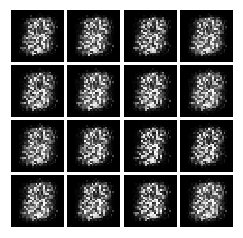

Iter: 100 = Discriminator Loss: Variable containing:
 0.3405
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9644
[torch.FloatTensor of size 1]



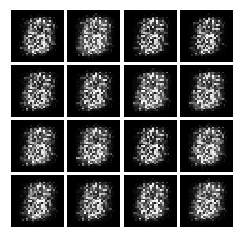

Iter: 200 = Discriminator Loss: Variable containing:
 0.4103
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9027
[torch.FloatTensor of size 1]



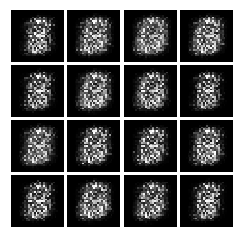

Iter: 300 = Discriminator Loss: Variable containing:
 0.4385
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.7136
[torch.FloatTensor of size 1]



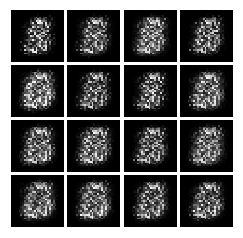

Iter: 400 = Discriminator Loss: Variable containing:
 0.4184
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.6406
[torch.FloatTensor of size 1]



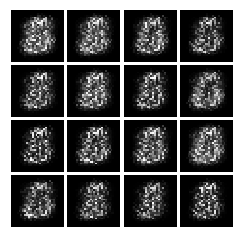

Iter: 500 = Discriminator Loss: Variable containing:
 0.3959
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.5232
[torch.FloatTensor of size 1]



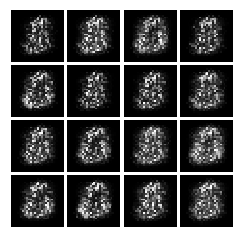

Iter: 600 = Discriminator Loss: Variable containing:
 0.3824
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.5073
[torch.FloatTensor of size 1]



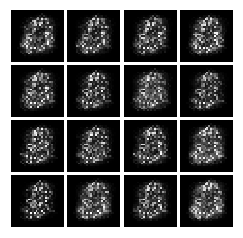

Iter: 700 = Discriminator Loss: Variable containing:
 0.6271
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.3920
[torch.FloatTensor of size 1]



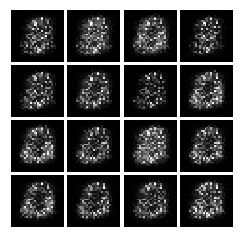

Iter: 800 = Discriminator Loss: Variable containing:
 0.6333
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.2371
[torch.FloatTensor of size 1]



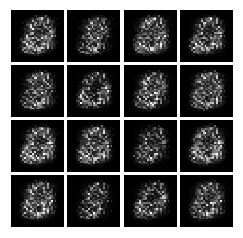

Iter: 900 = Discriminator Loss: Variable containing:
 0.6543
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.2363
[torch.FloatTensor of size 1]



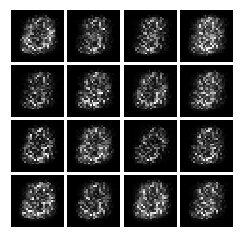

Iter: 1000 = Discriminator Loss: Variable containing:
 0.4414
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.2939
[torch.FloatTensor of size 1]



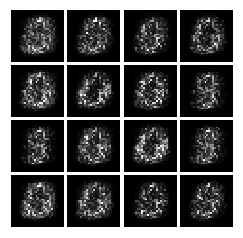

Iter: 1100 = Discriminator Loss: Variable containing:
 0.6010
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.2790
[torch.FloatTensor of size 1]



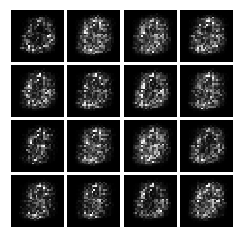

Iter: 1200 = Discriminator Loss: Variable containing:
 0.5017
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.0887
[torch.FloatTensor of size 1]



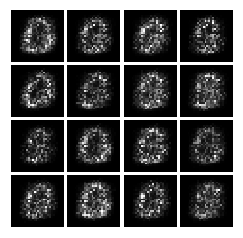

Iter: 1300 = Discriminator Loss: Variable containing:
 0.5598
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.1970
[torch.FloatTensor of size 1]



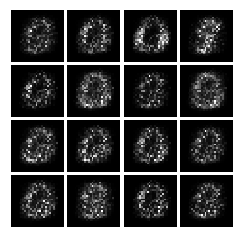

Iter: 1400 = Discriminator Loss: Variable containing:
 0.3879
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.3110
[torch.FloatTensor of size 1]



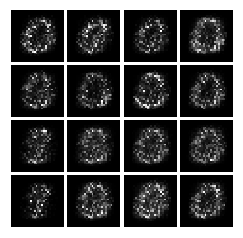

Iter: 1500 = Discriminator Loss: Variable containing:
 0.4007
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.3528
[torch.FloatTensor of size 1]



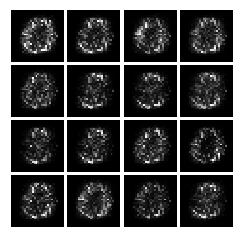

Iter: 1600 = Discriminator Loss: Variable containing:
 0.5100
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.3291
[torch.FloatTensor of size 1]



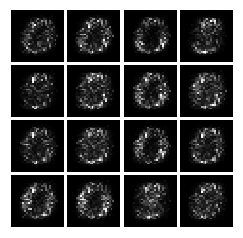

Iter: 1700 = Discriminator Loss: Variable containing:
 0.3588
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.3269
[torch.FloatTensor of size 1]



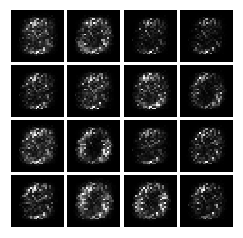

Iter: 1800 = Discriminator Loss: Variable containing:
 0.2936
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.4542
[torch.FloatTensor of size 1]



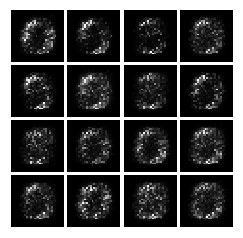

Iter: 0 = Discriminator Loss: Variable containing:
 0.3229
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.4647
[torch.FloatTensor of size 1]



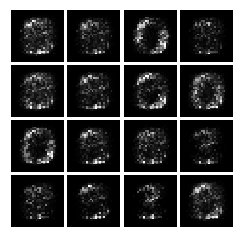

Iter: 100 = Discriminator Loss: Variable containing:
 0.4306
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.6663
[torch.FloatTensor of size 1]



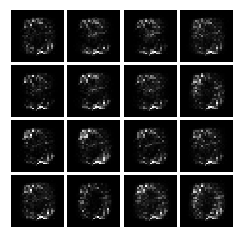

Iter: 200 = Discriminator Loss: Variable containing:
 0.2956
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.5078
[torch.FloatTensor of size 1]



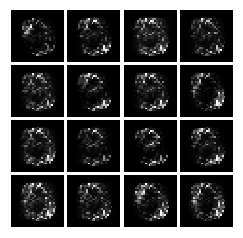

Iter: 300 = Discriminator Loss: Variable containing:
 0.3825
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.6204
[torch.FloatTensor of size 1]



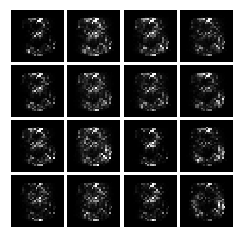

Iter: 400 = Discriminator Loss: Variable containing:
 0.2419
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.6478
[torch.FloatTensor of size 1]



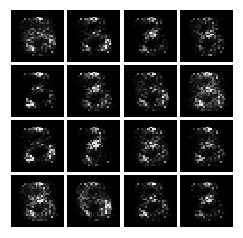

Iter: 500 = Discriminator Loss: Variable containing:
 0.2664
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.8043
[torch.FloatTensor of size 1]



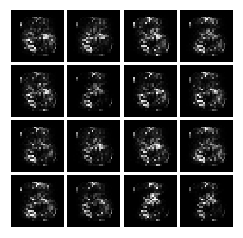

Iter: 600 = Discriminator Loss: Variable containing:
 0.2702
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.7828
[torch.FloatTensor of size 1]



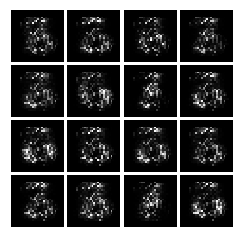

Iter: 700 = Discriminator Loss: Variable containing:
 0.2681
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9932
[torch.FloatTensor of size 1]



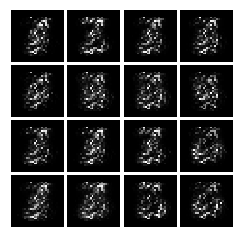

Iter: 800 = Discriminator Loss: Variable containing:
 0.2199
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.1847
[torch.FloatTensor of size 1]



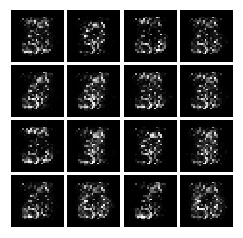

Iter: 900 = Discriminator Loss: Variable containing:
 0.3347
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.1710
[torch.FloatTensor of size 1]



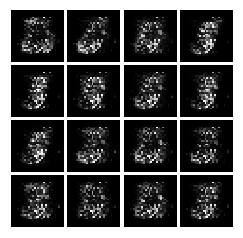

Iter: 1000 = Discriminator Loss: Variable containing:
 0.2593
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.0321
[torch.FloatTensor of size 1]



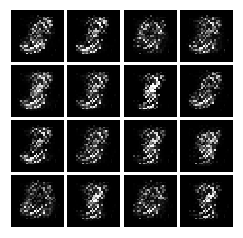

Iter: 1100 = Discriminator Loss: Variable containing:
 0.3023
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9946
[torch.FloatTensor of size 1]



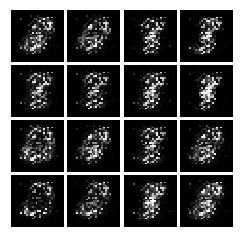

Iter: 1200 = Discriminator Loss: Variable containing:
 0.4745
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.8148
[torch.FloatTensor of size 1]



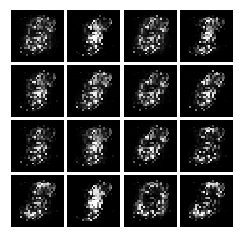

KeyboardInterrupt: 

In [83]:
for e in range(100):
    train()